In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("wine.txt", sep=" ")

In [3]:
df

,Year,Wine,Cluster
0,1971,5.6,116.37
1,1973,3.2,82.77
2,1974,4.5,110.68
3,1975,4.2,97.50
4,1976,5.2,115.88
5,1977,2.7,80.19
6,1978,4.8,125.24
7,1979,4.9,116.15
8,1980,4.7,117.36
9,1981,4.1,93.31


<AxesSubplot:xlabel='Cluster', ylabel='Wine'>

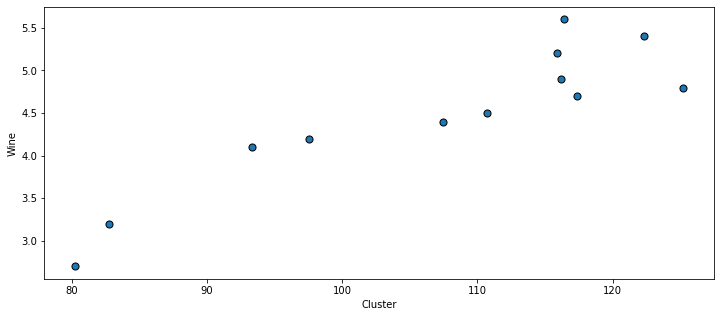

In [4]:
df.plot.scatter(x='Cluster', y='Wine', figsize=(12, 5), s=50, linewidths=1, edgecolor='black')

In [5]:
x = df['Cluster']
y = df['Wine']

Find $\hat{\beta}_0$ and $\hat{\beta}_1$  in [1]

$\hat{\beta}_1 = \frac{\sum(X_i – \bar{X}) (Y_i – \bar{Y})} {\sum(X_i – \bar{X})^2}$


$\hat{\beta}_0 = \bar{Y} – \hat{\beta}_1 \bar{X}$


[1] https://towardsdatascience.com/simple-linear-regression-in-python-numpy-only-130a988c0212

In [6]:
def linear_regression(x, y):     
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'y = {} + {}β'.format(round(B0, 3), round(B1, 3))
    
    return (B0, B1, reg_line)

In [7]:
B0, B1, line = linear_regression(x, y)

In [8]:
print(B0, B1, line)
print("Value of $\hat{\beta}_0$ is: ", round(B0, 3))
print("Value of $\hat{\beta}_1$ is: ", round(B1, 3))
print("The line equation: ", line)

-1.027902709556801 0.051380577893637314 y = -1.028 + 0.051β
Value of $\hat{eta}_0$ is:  -1.028
Value of $\hat{eta}_1$ is:  0.051
The line equation:  y = -1.028 + 0.051β


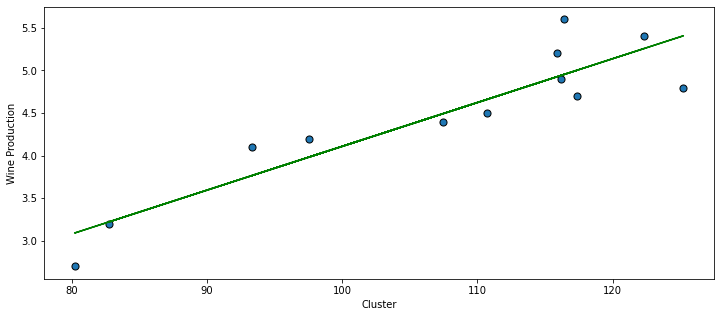

In [9]:
plt.figure(figsize=(12,5))
plt.scatter(x, y, s=50, linewidths=1, edgecolor='black')
plt.xlabel('Cluster')
plt.ylabel('Wine Production')
plt.plot(x, B0 + B1 * x, c="green")

In [10]:
def predict(B0, B1, new_x):
    y = B0 + B1 * new_x
    return y

In [11]:
new_cluster = 100

predict_wine = round(predict(B0, B1, new_cluster), 3)
print(predict_wine)

4.11


When the the number of berries in a bunch of grapes is 100 then the yearly production of wine will be 4.11

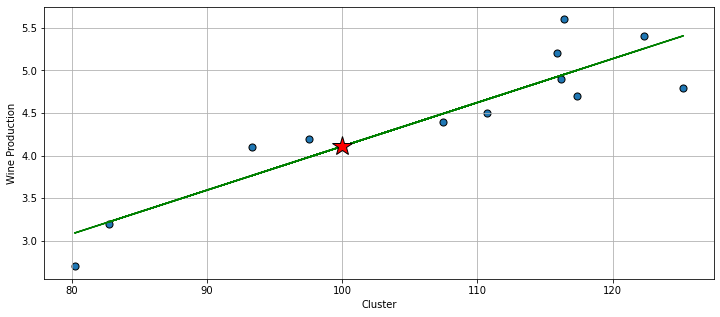

In [12]:
plt.figure(figsize=(12,5))
plt.scatter(x, y, s=50, linewidths=1, edgecolor='black')
plt.xlabel('Cluster')
plt.ylabel('Wine Production')
plt.grid()
plt.plot(x, B0 + B1 * x, c="green")
plt.plot(new_cluster, predict_wine, marker="*", markersize=20, markeredgecolor="black", markerfacecolor="red")
plt.show()